## Alumno: Gerardo de Miguel González

## Distribuciones

*1.- Generar una muestra de tamaño N = 10000 correspondiente a la altura de personas adultas, asumiendo que su densidad de probabilidad es una función normal/gaussiana con μ= 1.78m y σ= 0.1 m.*

**nota**: mis comentarios están marcados con *::GMG::*

### Muestra

In [2]:
#::GMG::Fijamos una semilla (seed) para que nuestras medidas sean reproducibles
set.seed(3000)
#::GMG::Parámetros de la distribución (pdf) normal de la variable aleatoria altura (m)
mu <- 1.78 # m
sigma <- 0.1 # m
#::GMG::Generamos una muestra aleatoria (random sample) de tamaño 10000 de la variable
#       aleatoria altura con una distribución (pdf) normal con parámetros mu y sigma
#
deviates <- rnorm(n = 10000,mean = mu,sd = sigma)

**::GMG::** La interpretación es que tenemos una realización (valores) que representa(n) el resultado de 10000 experimentos en los que se han hecho 10000 medidas de individuos sacados (elegidos) de la población de forma aleatoria con reemplazo. Cada medida de altura es la realización (se ha sacado) de una variable aleatoria con pdf N(1.78,0.1)

https://en.wikipedia.org/wiki/Sample_(statistics)

### Densidad de frecuencia y probabilidad

*Dibuja la densidad de frecuencia y la densidad de probabilidad por separado.*

**::GMG::** Sabemos de la teoría que existe una relación entre el histograma de frecuencias relativas de la muestra (sample) con el área de cada bin puesto de manera que todos los bins suman área 1 (histograma de densidad de frecuencias relativas) y la función de densidad de probabilidad (pdf).

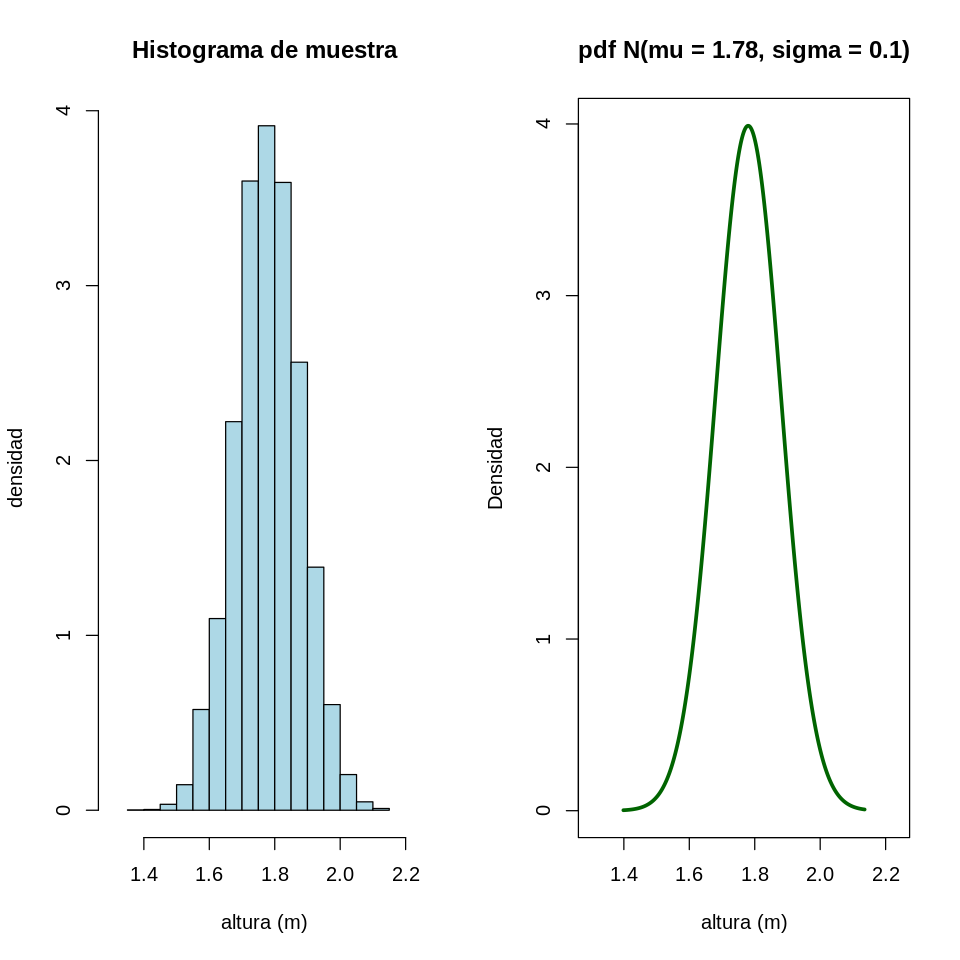

In [6]:
#::GMG::Ponemos una matriz de 1x2 para poner las gráficas emparejadas horizontalmente
options(repr.plot.width=8, repr.plot.height=8)
par(mfrow=c(1,2))
#::GMG::Graficamos el histograma de densidad de probailidad de la muestra
# https://www.statmethods.net/graphs/density.html
h <- hist(x = deviates,
     freq = FALSE, 
     breaks = 'Sturges',
     main = 'Histograma de muestra',
     col="lightblue",
     xlab='altura (m)', ylab='densidad',
     xlim=c(min(deviates) - 0.1, max(deviates) + 0.1))

#::GMG::Y la comparamos con la función densidad de probabilidad de la población
#       sobre una secuencia con el mismo dominio que la muestra generada
xseq <- seq(min(deviates),max(deviates),length=10001)
densities<-dnorm(xseq, mu,sigma)

#::GMG::Graficamos la distribución normal
plot(xseq, 
     densities, 
     col="darkgreen",
     xlab="altura (m)", ylab="Densidad", 
     type="l",lwd=3, 
     main="pdf N(mu = 1.78, sigma = 0.1)",
     xlim=c(min(deviates) - 0.1, max(deviates) + 0.1)
    )

**::GMG::**: vemos que el histograma de densidad de probabilidad se "aproxima" bien a la pdf de la población para el tamaño de la muestra de 10000 (habiendo elegido también el tamaño correcto del bin con *Sturges*, que a veces da problemas a la hora de ver la "forma" de la distribución a la que se tiende ...)

### Estadísticos vs parámetros

*Compara μ y σ con la media muestral y la varianza muestral.*

In [11]:
#::GMG::Para especificar los decimales que se visualizan del estadístico
specify_decimal <- function(x, k) trimws(format(round(x, k), nsmall=k))
paste('Una muestra de tamaño',length(deviates),
      'con media muestral', specify_decimal(mean(deviates),5),
      'y varianza muestral',specify_decimal(var(deviates),5),
      'y desviación típica muestral',specify_decimal(sd(deviates),5))
paste('La media de la población es',mu,
      'y la varianza',sigma**2,
      'y finalmente, la desviación típica',sigma)

#::GMG::Vemos el objeto histograma generado por R 
#       del que hemos dibujado $density al poner Freq = FALSE
#h

[1] "Una muestra de tamaño 10000 con media muestral 1.78022 y varianza muestral 0.00976 y desviación típica muestral 0.09877"

[1] "La media de la población es 1.78 y la varianza 0.01 y finalmente, la desviación típica 0.1"

## Estimadores

### Media

*2.- Considerar la distribución de probabilidad anterior y la media muestral para una muestra de tamaño N (TN). Generar un número alto M = 10000 de muestras y estudiar la distribución (μ-TN), para N = 10, 100, 1000, 10000, 100000. Calcular el valor esperado en cada caso (considerando el valor esperado como el promedio a los M = 10000 psuedo-experimentos) y dibujar el resultado en función de N.*

In [14]:
#::GMG::Función para generar M muestras de tamaño N dispuestos en una matriz de MxN
muestras <- function(N = 10, M = 10000, mu = 1.78, sigma = 0.1) {
    return (matrix(data = rnorm(M*N,mu,sigma), 
                   nrow = M, 
                   ncol = N, 
                   byrow = TRUE)
           )
}


In [27]:
#::GMG::Generamos los diferentes "experimentos" y calculamos la media
#       muestra y la viaranza muestral de cada una de las muestras de tamaño N
T.10 = muestras(N = 10)
#paste('T.10:= filas:',nrow(T.10), 'columnas:',ncol(T.10))
mm.10 <- apply(X = T.10,MARGIN = 1,FUN = mean)
vm.10 <- apply(X = T.10,MARGIN = 1,FUN = var)
#length(mm.10)

In [28]:
T.100 = muestras(N = 100)
#paste('T.100:= filas:',nrow(T.100), 'columnas:',ncol(T.100))
mm.100 <- apply(X = T.100,MARGIN = 1,FUN = mean)
vm.100 <- apply(X = T.100,MARGIN = 1,FUN = var)
#length(mm.100)

In [29]:
T.1000 = muestras(N = 1000)
#paste('T.1000:= filas:',nrow(T.1000), 'columnas:',ncol(T.1000))
mm.1000 <- apply(X = T.1000,MARGIN = 1,FUN = mean)
vm.1000 <- apply(X = T.1000,MARGIN = 1,FUN = var)
#length(mm.1000)

In [31]:
T.10000 = muestras(N = 10000)
#paste('T.10000:= filas:',nrow(T.10000), 'columnas:',ncol(T.10000))
mm.10000 <- apply(X = T.10000,MARGIN = 1,FUN = mean)
vm.10000 <- apply(X = T.10000,MARGIN = 1,FUN = var)
#length(mm.10000)

In [14]:
#::GMG::Viendo lo que ha tardado el anterior ... corto aquí :)
#T.100000 = muestras(100000)

**::GMG::**: lo que hemos hecho al calcular mm.N y vm.N es obtener un estadístico a partir de cada muestra (mean, var) para diferentes tamaños de N. De la teoría sabemos que esos estadísticos son variables aleatorias y se pueden utilizar como estimadores de los parámetros de la pdf de la población (mu, sigma^2) de la cual han sido extraídos. Lo que se pide es ver cuál es la distribución de esos estimadores para los diferentes tamaños de la muestra. Usamos un histograma de densidad y añadimos la curva de densidad, y el parámetro objetivo y ponemos su varianza y su esperanza. Suponemos ahora que nuestra población son las 10000 muestras.

In [81]:
#::GMG::Con la suposisión de 10000 muestras como población usamos la varianza
#       con denominador N :)
var.p = function(x){var(x)*(length(x)-1)/length(x)}

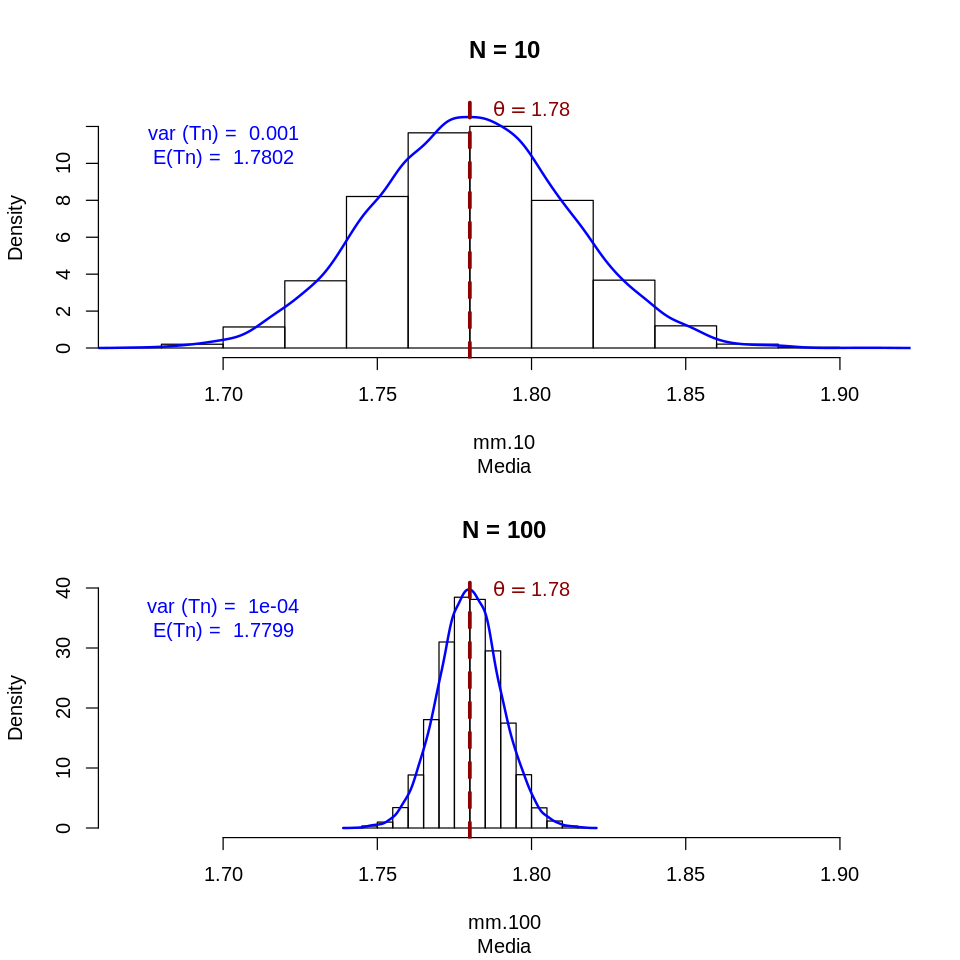

In [82]:
par(mfrow=c(2,1))
hist(mm.10, 
     freq=FALSE,
     breaks = 'Sturges',
     ylim = c(0,13), xlim = c(min(mm.10), max(mm.10)),
     main = 'N = 10',
     sub = 'Media')
lines(density(mm.10),lwd = 2,col = 'blue')
abline(v = mu, col="darkred", lwd=3, lty=2)
text(1.80,13, expression(italic(theta) == 1.78), col = 'darkred')
text(1.70, 11, 
     paste(' var (Tn) = ', round(var.p(mm.10),4), 
           '\nE(Tn) = ', round(mean(mm.10),4)),
    col = 'blue'
)


hist(mm.100, 
     freq=FALSE,
     breaks = 'Sturges',
     ylim = c(0,40), xlim = c(min(mm.10), max(mm.10)),
     main = 'N = 100',
     sub = 'Media')
lines(density(mm.100),lwd = 2,col = 'blue')
abline(v = mu, col="darkred", lwd=3, lty=2)
text(1.80,40, expression(italic(theta) == 1.78),col = 'darkred')
text(1.70, 35, 
     paste(' var (Tn) = ', round(var.p(mm.100),4), 
           '\nE(Tn) = ', round(mean(mm.100),4)),
    col = 'blue'
)

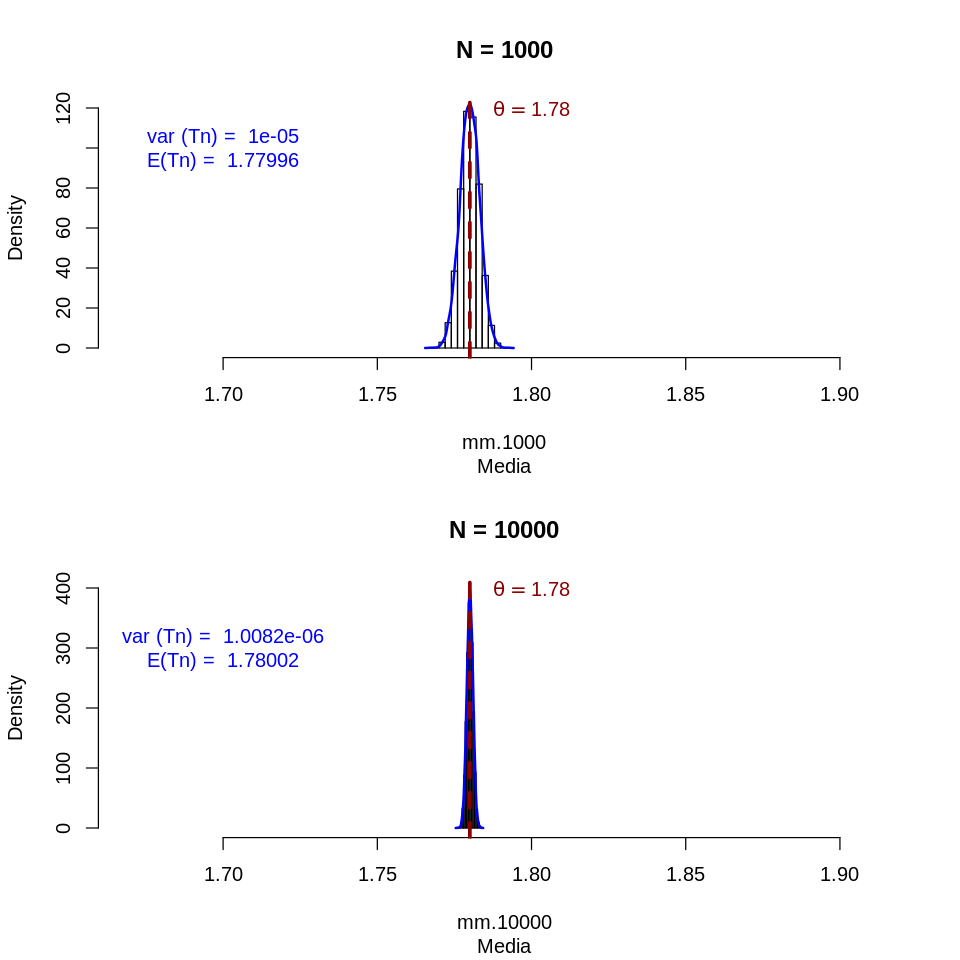

In [88]:
par(mfrow=c(2,1))
hist(mm.1000, 
     freq=FALSE,
     breaks = 'Sturges',
     ylim = c(0,120), xlim = c(min(mm.10), max(mm.10)),
     main = 'N = 1000',
     sub = 'Media')
lines(density(mm.1000),lwd = 2,col = 'blue')
abline(v = mu, col="darkred", lwd=3, lty=2)
text(1.80,120, expression(italic(theta) == 1.78), col = 'darkred')
text(1.70, 100, 
     paste(' var (Tn) = ', round(var.p(mm.1000),5), 
           '\nE(Tn) = ', round(mean(mm.1000),5)),
    col = 'blue'
)

hist(mm.10000, 
     freq=FALSE,
     breaks = 'Sturges',
     ylim = c(0,400), xlim = c(min(mm.10), max(mm.10)),
     main = 'N = 10000',
     sub = 'Media')
lines(density(mm.10000),lwd = 2,col = 'blue')
abline(v = mu, col="darkred", lwd=3, lty=2)
text(1.80,400, expression(italic(theta) == 1.78), col = 'darkred')
text(1.70, 300, 
     paste(' var (Tn) = ', round(var.p(mm.10000),10), 
           '\nE(Tn) = ', round(mean(mm.10000),5)),
    col = 'blue'
)

**::GMG::**: Aquí se comprueba claramente la **consistencia** del estimador `mm.N`:

\begin{equation*}
\lim_{N\to\infty} E(mm.N) = \theta
\end{equation*}

\begin{equation*}
\lim_{N\to\infty} Var(mm.N) = 0
\end{equation*}

### Varianza (fórmula insesgada)

*Repetir el mismo procedimiento usando la varianza (considerando de nuevo las las M = 10000 pseudo-muestras).*

### Varianza (fórmula sesgada)

3.- Considerar la distribución de probabilidad anterior y la fórmula sesgada de la varianza. Generar un número alto de M = 10000 de muestras y estudiar la distribución (σ-SN), para N = 10, 100, 1000, 10000, 100000. Calcular el valor esperado en cada caso (usando de nuevo la media muestral) y dibujar el resultado en función de N. ¿Se trata de un estimador consistente?

### Mediana

4.- Repetir 2) utilizando la mediana en lugar de la media. ¿Cuál de los dos estimadores es más eficiente?